# Storage and retrieval of light in optomechanical system

## Hamiltonian
$$
\begin{equation}
\boxed{\hat{H} = \hbar\Delta\hat{a}^\dagger\hat{a} +\hbar\omega_m\hat{b}^\dagger\hat{b}  - \hbar g_0\hat{a}^\dagger\hat{a}\left(\hat{b}^\dagger + \hat{b}\right) + i\hbar\varepsilon_l\left(a^\dagger  -\hat{a}\right) + i\hbar\varepsilon_p\left(a^\dagger e^{-i(\omega_p - \omega_l) t} -\hat{a}e^{i(\omega_p - \omega_l) t}\right)}
\end{equation}
$$

where,

$$
\begin{equation}
\tilde{\Delta} = \Delta - g_0\left(\beta+\beta^*\right)\quad\left(\Delta = \omega_0 - \omega_l\right)
\end{equation}
$$

## Heisenberg's equations of motion

$$
\partial_t\hat{x} = \frac{i}{\hbar}[\hat{H}, \hat{x}]
$$

Using relations, $[\hat{a}^\dagger\hat{a}, \hat{a}] = -\hat{a}$, $[\hat{a}^\dagger, \hat{a}] = 1$ and $[\hat{x}^\dagger\hat{x}, \hat{y}] =0$


$$
\begin{align}
\frac{d\hat{a}}{dt} &= -\left(\frac{\kappa}{2} + i\Delta\right)\hat{a} + ig_0\hat{a}\left(\hat{b}^\dagger + \hat{b}\right) -\varepsilon_l -\varepsilon_p e^{-i(\omega_p - \omega_l) t}\\
%
\frac{d\hat{b}}{dt} &= -\left(\frac{\gamma_m}{2} + i\omega_m\right)\hat{b} + i g_0\hat{a}^\dagger\hat{a} 
\end{align}
$$

We make the following substitutions 
%
$$
\begin{align}
	<\hat{a}> \approx \alpha + \alpha_+e^{-i(\omega_p -\omega_l)t}  \quad\text{ and }\quad<\hat{b}> \approx \beta + \beta_+e^{-i(\omega_p -\omega_l)t}\label{eq:linearization_approximation_1}
\end{align}
$$

and apply a rotating wave approximation. This finally gives us the following equations:

$$
\begin{align}
	\frac{d\alpha_+}{dt} &= -\left(\frac{\kappa}{2}  -i \Delta_x\right)\alpha_+ + iG(t)\beta_+ + \varepsilon_p(t)\\
	%	
	\frac{d\beta_+}{dt} &= -\left(\frac{\gamma_m}{2} -i \Delta_y\right) \beta_+ + iG^*(t)\alpha_+
\end{align}
$$

where, $G(t) = \alpha(t)g_0$ and

$$
\begin{align}
	\Delta_x &= \omega_p - \omega_l - \Delta\\
	%
	\Delta_y &= \omega_p - \omega_l - \omega_m
\end{align}
$$

and $\Delta = \omega_0 - \omega_l - 2\frac{|a_0|^2 g^2}{\omega_m}$.

The solutions of the equation are used to achieve ``\textit{storage and retrieval}" of a probe pulse. The probe pulse is taken as a Gaussian pulse is tuned to cavity resonance frequency, $\omega_0$:
%
$$
\begin{equation}
	\varepsilon_p(t) \propto \exp\left[-\frac{\left(t - t_{\text{write}}\right)^2}{2\sigma_p^2}\right]
\end{equation}
$$

and the control pulses (write and read) are taken to be Gaussian pulses and is turned at a frequency, which is lesser than the cavity resonance frequency by $\omega_m$:

$$
\begin{equation}
	G(t) \propto \exp\left[-\frac{\left(t - t_{\text{write}}\right)^2}{2\sigma_c^2}\right] + \exp\left[-\frac{\left(t - t_{\text{read}}\right)^2}{2\sigma_c^2}\right]
\end{equation}
$$

Here, $\sigma_{p(c)}$ are the widths of probe(control) pulse and $t_{\text{write}}$, $t_{\text{read}}$ are the writing and reading times.

# Libraries

In [17]:
import numpy as np
from scipy.integrate import solve_ivp
import scipy.constants as sc

# Constants

In [18]:
iota = complex(0,1)
pi = sc.pi
hbar = sc.hbar
speed_of_light = sc.c

# Parameters

## Decay rates
$\kappa = 2\pi\times1.5$ MHz, $\gamma_m =2\pi\times41$ KHz, 

## Frequencies
$\omega_m = 2\pi\times51.8$ MHz, $\Delta = \omega_m$.
$\omega_p = \omega_0$, $\omega_l = \omega_0 - \omega_m$

## Other parameters
$\lambda_l = 775$ nm, drive power, $\mathcal{P}_l = 1$ mW, $g_0 = 2\pi\times 1.55$ KHz

## Times
$\sigma_p = \sigma_c = 0.3$ $\mu$s,
$\tau_{\text{write}} = 10\kappa$,
$\tau_{\text{read}} = 40\kappa$

In [19]:
# Decay rates
gamma_m_0 = 2*pi*41e3
kappa_0 = 2*pi*1.5e6

# Frequencies
lambda_l = 775e-9
omega_l_0 = 2*pi*speed_of_light/lambda_l
omega_m_0 = 2*pi*51.8e6
omega_p_0 = omega_0
omega_c_0 = omega_m_0 + omega_l_0

g_0 = 2*pi*1.55e3

# detuning
delta_0    = omega_m_0

# field amplitudes
power = 1e-3     # power of control (1 milli watts)

epsilon_l_0 = np.sqrt(2*kappa_0*power/(hbar*omega_l_0))
epsilon_p_0 = np.sqrt(2*kappa_0*power*1e-4/(hbar*omega_p_0))

In [20]:
# gamma_m  = gamma_m_0/kappa_0
# kappa    = kappa_0/kappa_0
# g        = g_0/kappa_0     
# omega_m  = omega_m_0/kappa_0


print(epsilon_l_0/kappa_0, epsilon_p_0/kappa_0, 0.3e-6*kappa_0, 10/kappa_0, 40/kappa_0)

28773.448762462736 883041.2226896192 2.827433388230814 1.061032953945969e-06 4.244131815783876e-06


# Parameters normalized w.r.t $\kappa$

In [21]:
# field amplitudes
E_0_c = 2.876366e4
#E_0_p = 2.876366e4
E_0_p = 8.8304122269e6

g_0 = 1.033e-3

# decay rates
kappa = 1
gamma_m = 0.027

# frequencies
omega_m = 34.533
omega_l = 2.5806e8
omega_p = omega_0               # probe frequency

# detuning
delta    = omega_m
delta_x  = (omega_p - omega_l - delta)
delta_y  = (omega_p - omega_l - omega_m)

# cavity resonance frequency
omega_0 = omega_l + delta     # cavity resonance frequency


# times
t_write  = 10
t_read   = 40
tau_p    = 2.82740
tau_l    = 2.82740

# Define the functions

In [22]:
# Define the function for the time-dependent Gaussian function
def gaussian(t, center, width):
    return np.exp(-(t - center)**2/(2*width**2))

# Define other functions
def G(t):
    G_temp_1 = E_0_c*(gaussian(t, t_write, tau_l) + gaussian(t, t_read, tau_l))
    G_temp_2 = (G_temp_1/(1 + iota*delta))*g_0
    
    return G_temp_2

def epsilon_p(t):
    return E_0_p*gaussian(t, t_write, tau_p)

# Define the coupled differential equations
def equations(t, y):
    dydt = np.zeros(2, dtype=np.complex128)
    
    dydt[0] = -(kappa - iota*delta_x)*y[0] + iota*G(t)*y[1] - epsilon_p(t)
    dydt[1] = -(gamma_m - iota*delta_y)*y[1] + iota*np.conj(G(t))*y[0]

    return dydt

# Initial condition and solving the equations

In [23]:
# Initial conditions
y0 = [complex(0,0),complex(0,0)]       # Initial values for y1 and y2
t_span = (0, 60)                       # Time span for the solution

# Solve the differential equations
sol = solve_ivp(equations, t_span, y0, t_eval=np.linspace(t_span[0], t_span[1], 6000))

# plots

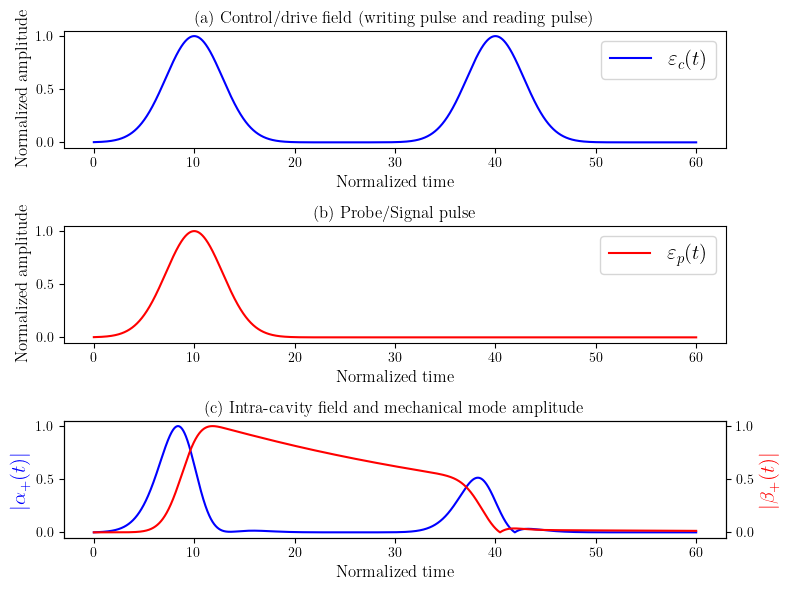

In [24]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

# enable TeX fonts
plt.rcParams['text.usetex'] = True

# Set the global font size for all legends
mpl.rcParams['legend.fontsize'] = 15

# Set the global font size for all axis labels
mpl.rcParams['axes.labelsize'] = 12

# Set the global font style for all axis labels
plt.rcParams['font.family'] = 'Times New Roman'


# Create a figure and axis for the subplots
fig, axs = plt.subplots(3, 1, figsize=(8, 6))

# define a time vector
t = np.linspace(t_span[0], t_span[1], 6000)

# Plot the first subplot (top plot)
axs[0].plot(t, G(t)/np.max(G(t)), label=r'$\varepsilon_c(t)$', color='blue')
axs[0].set_title('(a) Control/drive field (writing pulse and reading pulse)')
axs[0].set_xlabel('Normalized time')
axs[0].set_ylabel('Normalized amplitude')
axs[0].legend()

# Plot the second subplot (middle plot)
axs[1].plot(t, epsilon_p(t)/np.max(epsilon_p(t)), label=r'$\varepsilon_p(t)$', color='red')
axs[1].set_title('(b) Probe/Signal pulse')
axs[1].set_xlabel('Normalized time')
axs[1].set_ylabel('Normalized amplitude')
axs[1].legend()

# plot the third subplot (bottom plot)
y1 = np.abs(sol.y[0])
y2 = np.abs(sol.y[1])

# Plot data on the first y-axis
axs[2].plot(t, y1/np.max(np.abs(y1)), 'b-')
axs[2].set_title('(c) Intra-cavity field and mechanical mode amplitude')
axs[2].set_xlabel('Normalized time')
axs[2].set_ylabel(r'$|\alpha_+(t)|$', color='b', fontsize = 15)

# Duplicate the x-axis for the second y-axis
axs2_dup = axs[2].twinx()

# Plot data on the second y-axis
axs2_dup.plot(t, y2/np.max(np.abs(y2)), 'r-')
axs2_dup.set_ylabel(r'$|\beta_+(t)|$', color='r', fontsize = 15)


# Adjust the layout to prevent overlap
plt.tight_layout()

# save the plot to a file
plt.savefig('figure9.png', dpi=300)

# Show the plots
plt.show()

